In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rd

In [2]:
def co_drastic(x, y): 
    '''
    def aux_func(x,y):
        if x==1:
            return y
        if y==1:
            return x 
        else:
            return 0
    '''
    def aux_func(x,y):
        return 1
    a,b = np.shape(x)
    z = np.empty((a,b))
    for i in range(a):
        for j in range(b):
            z[i][j] = aux_func(x[i][j],y[i][j])
    return z

def co_hamacher(x, y):
    def aux_func(x,y):
        return (x + y - 2*x*y)/(1 - x*y)
    a,b = np.shape(x)
    z = np.empty((a,b))
    for i in range(a):
        for j in range(b):
            z[i][j] = aux_func(x[i][j],y[i][j])
    return z

def co_product(x, y):
    def aux_func(x,y):
        return x+y - x*y
    a,b = np.shape(x)
    z = np.empty((a,b))
    for i in range(a):
        for j in range(b):
            z[i][j] = aux_func(x[i][j],y[i][j])
    return z

def co_lukasiewicz(x, y):
    def aux_func(x,y):
        return min(x + y, 1) 
    a,b = np.shape(x)
    z = np.empty((a,b))
    for i in range(a):
        for j in range(b):
            z[i][j] = aux_func(x[i][j],y[i][j])
    return z

def maximum(x, y):
    return np.maximum(x,y)

In [3]:
#(x,1,1)
x1=list(np.linspace(0,1,100))
y1=[1 for x in x1]
z1=[1 for x in x1]

#(1,y,1)
y2=list(np.linspace(0,1,100))
x2=[1 for x in y2]
z2=[1 for x in x2]

#(0,y,y)
y3=list(np.linspace(0,1,100))
x3=[0 for y in y3]
z3=y3

#(x,0,x)
x4=list(np.linspace(0,1,100))
y4=[0 for x in x4]
z4=x4

#(0,0,z)
z5=list(np.linspace(0,1,100))
y5=[0 for x in z5]
x5=[0 for x in z5]

#(0,y,1)
y6=list(np.linspace(0,1,100))
x6=[0 for x in y6]
z6=[1 for x in y6]

#(x,0,1)
x7=list(np.linspace(0,1,100))
y7=[0 for x in x7]
z7=[1 for x in x7]

#(1,1,1)
x8=list(np.linspace(0,1,100))
y8=x8
z8=x8

y9=list(np.linspace(0,1,100))
x9=[-y+1 for y in y9]
z9=[1 for y in y9]

/var/folders/q_/f4gdxlld76b6mq78l6vflz140000gp/T/ipykernel_10083/704089772.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return (x + y - 2*x*y)/(1 - x*y)


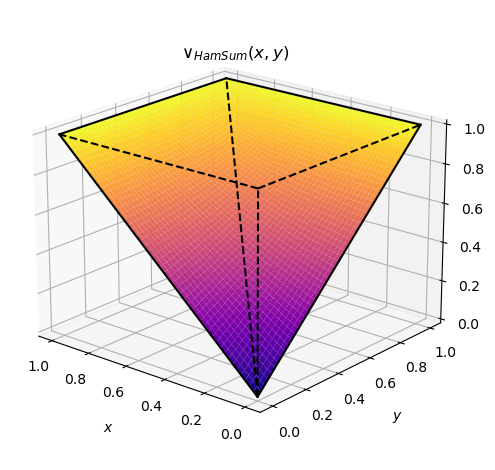

/var/folders/q_/f4gdxlld76b6mq78l6vflz140000gp/T/ipykernel_10083/704089772.py:22: RuntimeWarning: invalid value encountered in double_scalars
  return (x + y - 2*x*y)/(1 - x*y)


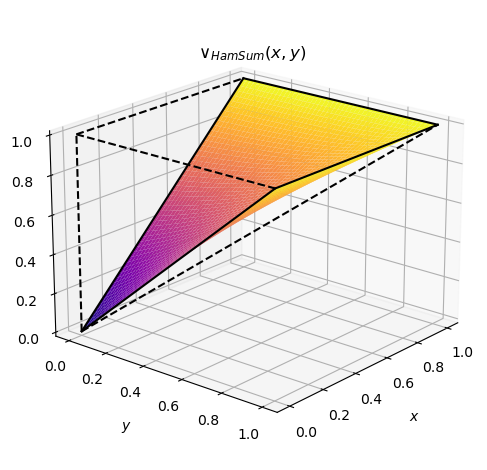

In [5]:
azims=[310, 40]
for i in range(len(azims)):
    surface=True
    #function = co_lukasiewicz
    #name = 'Luka'

    #function = co_hamacher
    #name = 'coHam'

    #function = co_product
    #name = 'ProbSum'

    #function = maximum
    #name = 'Max'

    function = co_hamacher
    name = 'HamSum'

    boundary=True
    my_azim = azims[i]
    my_elev=20

    # Define the range for x and y
    x = np.linspace(0, 1, 100)
    y = np.linspace(0, 1, 100)

    # Create a grid of x and y values
    X, Y = np.meshgrid(x, y)

    # Define your T-norm function here
    # For example, let's use the minimum T-norm (also known as the "product" T-norm)
    Z = function(X,Y)

    # Create a 3D plot
    fig = plt.figure()

    # Adjust subplot parameters to leave space on the right side for labels
    ax = fig.add_subplot(111, projection='3d', computed_zorder=False)

    # Plot the surface
    if surface is True:
        ax.plot_surface(X, Y, Z, cmap='plasma', alpha=1, zorder=1, linewidth=0.5)
    #cmap='YlOrRd_r'

    # Plot the Boundary
    if boundary is True:
        ax.plot(x1, y1, z1, color='black', linestyle='-', zorder=1)
        ax.plot(x2, y2, z2, color='black', linestyle='-', zorder=1)
        ax.plot(x3, y3, z3, color='black', linestyle='-', zorder=1)
        ax.plot(x4, y4, z4, color='black', linestyle='-', zorder=1)
            
        ax.plot(x5, y5, z5, color='black', linestyle='--', zorder=1)
        ax.plot(x6, y6, z6, color='black', linestyle='--', zorder=1)
        ax.plot(x7, y7, z7, color='black', linestyle='--', zorder=1)
        ax.plot(x8, y8, z8, color='black', linestyle='--', zorder=2)

        if name == 'Luka':
            ax.plot(x9, y9, z9, color='black', linestyle='--', zorder=2)

    # Set the view angle to reposition the z-axis (adjust azimuth and elevation as needed)
    #ax.view_init(azim=315, elev=30)
    ax.view_init(azim=my_azim,elev=my_elev)

    # Invert the X-axis (reversed)
    ax.invert_xaxis()

    # Label the axes (optional)
    ax.set_xlabel(r'$x$', labelpad=10)
    ax.set_ylabel(r'$y$', labelpad=10)

    #ax.set_zlabel(r'$\wedge (x,y)$', labelpad=10, rotation=45)
    if boundary is True and surface is False and i==0:
        plt.title(r'$\vee(x,y)$', x=0.5, y=0.95)
        plt.tight_layout()
        fig.savefig('/Users/Bernardo/Desktop/Boundary T-Conorm.pdf',bbox_inches="tight")
    elif boundary is True and surface is False and i==1:
        plt.title(r'$\vee(x,y)$', x=0.5, y=0.95)
        plt.tight_layout()
        fig.savefig('/Users/Bernardo/Desktop/Boundary T-Conorm Side.pdf',bbox_inches="tight")
    elif i==0:
        plt.title(r'$\vee_{%s} (x,y)$'%(name), x=0.5, y=0.95)
        plt.tight_layout()
        fig.savefig(f'/Users/Bernardo/Desktop/{name} T-Conorm.pdf',bbox_inches="tight")
    elif i==1:
        plt.title(r'$\vee_{%s} (x,y)$'%(name), x=0.5, y=0.95)
        plt.tight_layout()
        fig.savefig(f'/Users/Bernardo/Desktop/{name} T-Conorm Side.pdf',bbox_inches="tight")

    # Show the plot
    plt.show()